In [1]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, ParameterGrid

import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [2]:
def investigate_comp(comp, resdf):
    def avg_cols(df, cols):
        return df[cols].mean(axis=1)
    comp_list = list(range(0,resdf.shape[1]))
    comp_list.remove(comp)
    other_pts = avg_cols(resdf,comp_list)
    return resdf[comp] - other_pts
    

In [3]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [4]:
# 5% edges
sympdf = sympdf.loc[:, (sympdf.sum() / sympdf.shape[0] > 0.05) & (sympdf.sum()  / sympdf.shape[0]< 0.95)]

In [5]:
sympdf.shape

(6031, 147)

In [6]:
# patient is a mixture of classes but it's meant to represent probs rather than actual multiple class labels
# so this model is less complex, but it might still be more appropriate, it'll depend

model = StepMix(n_components=9, measurement="binary", verbose=0, random_state=123)


In [7]:
model.fit(sympdf)


Fitting StepMix...


Initializations (n_init) :   0%|          | 0/1 [00:00<?, ?it/s]

Initializations (n_init) : 100%|██████████| 1/1 [00:04<00:00,  4.26s/it, max_LL=-4.1e+5, max_avg_LL=-68]


StepMix(measurement='binary', n_components=9, random_state=123)

In [9]:
grid = {
    'n_components': [ 2,3, 4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20],
}





In [10]:
dfs = []
for i in range(1,10):
    # select i*0.1 of the data columns
    dfs.append(sympdf.sample(frac=i*0.1, axis=1, random_state=123))
dfs.append(sympdf)

In [23]:
%%capture
results = dict(param_n_components=[], aic=[], bic=[], symp_frac=[])

# Same model and grid as above
for g in ParameterGrid(grid):
    model.set_params(**g)
    for i in range(len(dfs)):
        model.fit(dfs[i])
        results['param_n_components'].append(g['n_components'])
        results['aic'].append(model.aic(dfs[i]))
        results['bic'].append(model.bic(dfs[i]))
        results['symp_frac'].append(dfs[i].shape[1] / sympdf.shape[1])

# Save results to a dataframe
results = pd.DataFrame(results)

<Axes: xlabel='param_n_components', ylabel='aic'>

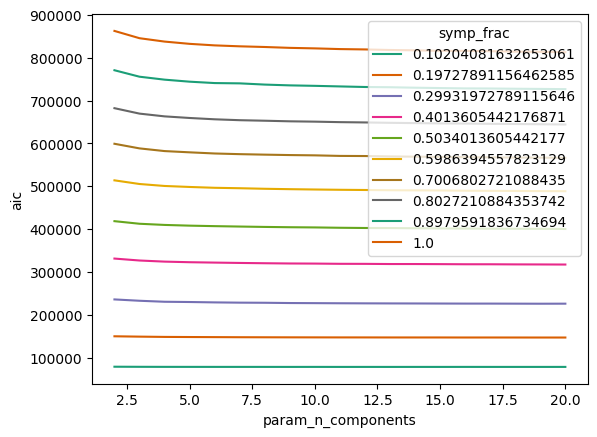

In [24]:
#sns.lineplot(data=results, x='param_n_components', y='aic',
#             palette='Dark2')

# lineplot with separate lines for each value of 'symp_frac'
sns.lineplot(data=results, x='param_n_components', y='aic',
             hue='symp_frac', palette='Dark2')

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


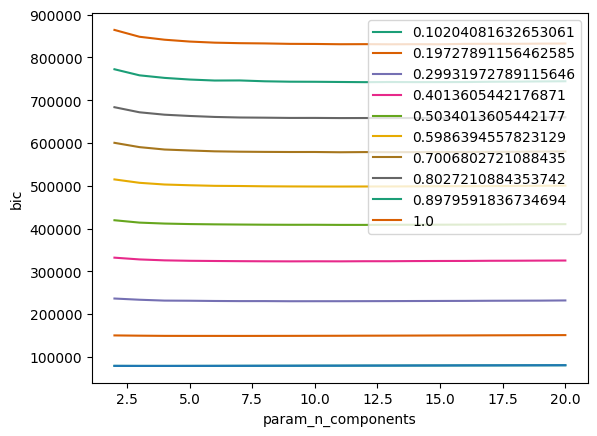

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


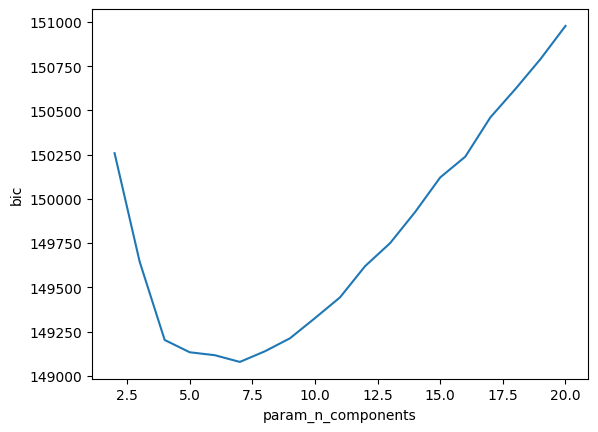

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


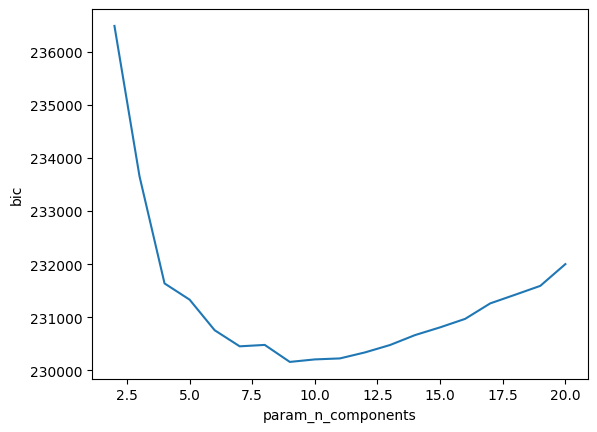

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


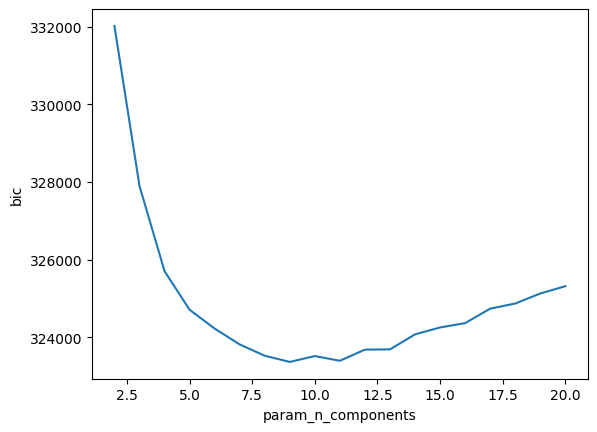

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


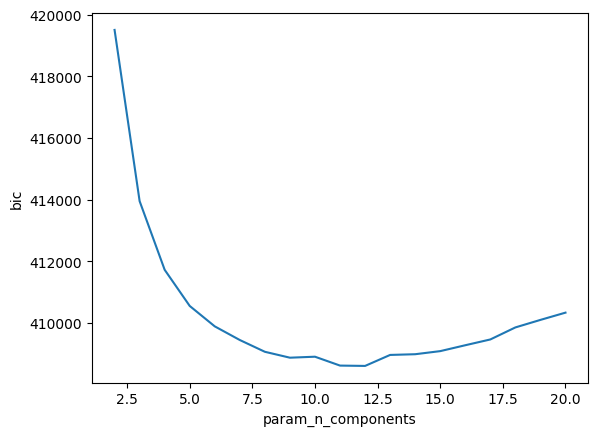

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


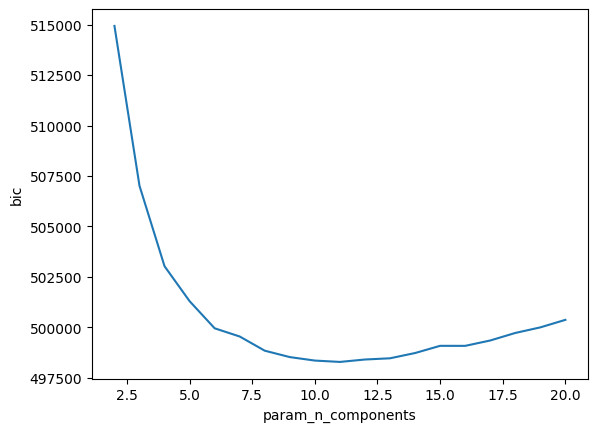

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


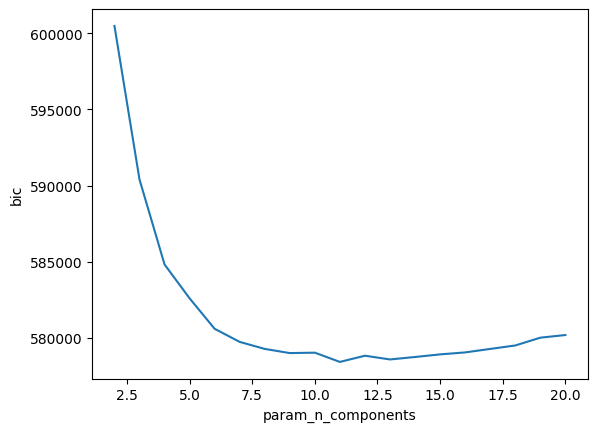

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


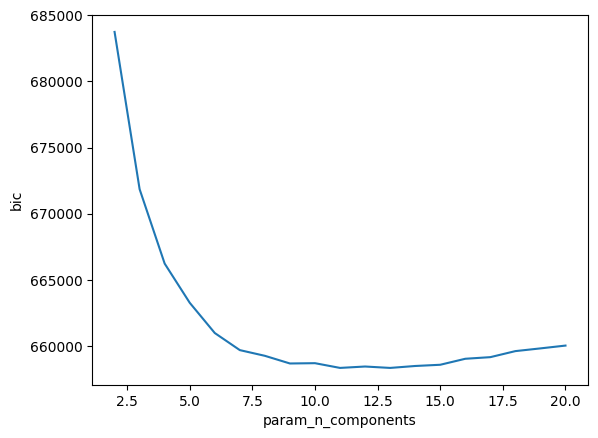

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


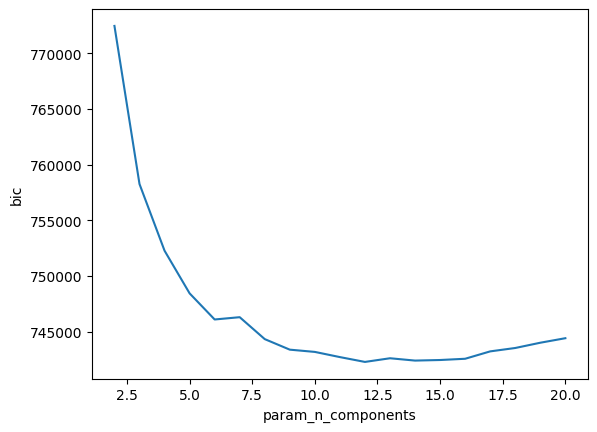

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_68007/274185156.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',


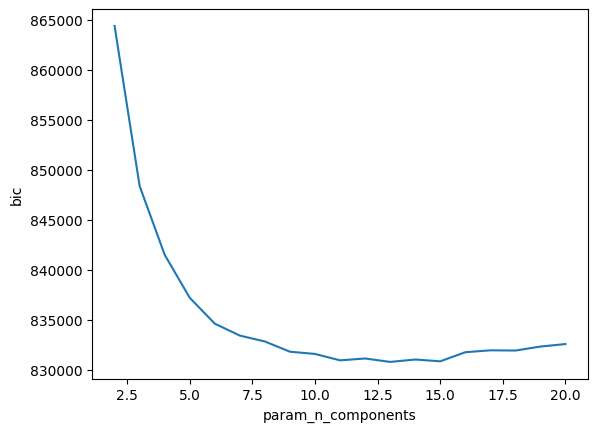

In [25]:
sns.lineplot(data=results, x='param_n_components', y='bic',
            palette='Dark2',hue='symp_frac') 

# plot separate line plots for each symp_frac value
for i in results['symp_frac'].unique():
    sns.lineplot(data=results[results['symp_frac']==i], x='param_n_components', y='bic',
             palette='Dark2')
    plt.show()

In [50]:
results['bic']

0       86444.770352
1      178714.979346
2      258726.211344
3      337118.581280
4      423417.943331
           ...      
130    408716.483469
131    496303.330590
132    580575.086753
133    653406.500929
134    753134.777198
Name: bic, Length: 135, dtype: float64

In [54]:
# print the row of results with the lowest bic for each symp_frac value
for i in results['symp_frac'].unique():
#    print(results[results['symp_frac']==i].iloc[results[results['symp_frac']==i]['bic'].idxmin()])
    print(results[results['symp_frac']==i])


#results.iloc[results['bic'].idxmin()]


     param_n_components           aic           bic  symp_frac
0                     2  86250.334977  86444.770352          0
9                     3  85763.985304  86058.990701          0
18                    4  85541.952251  85937.527670          0
27                    5  85394.014249  85890.159690          0
36                    6  85342.600361  85939.315823          0
45                    7  85294.909473  85992.194957          0
54                    8  85281.260887  86079.116393          0
63                    9  85250.002168  86148.427695          0
72                   10  85255.202718  86254.198267          0
81                   11  85243.076064  86342.641635          0
90                   12  85244.429110  86444.564702          0
99                   13  85239.135252  86539.840866          0
108                  14  85231.653528  86632.929163          0
117                  15  85264.775447  86766.621104          0
126                  16  85223.756618  86826.172297    

In [29]:
# for each value of symp_frac in results return the row with the lowest bic
bestfits = results.loc[results.groupby('symp_frac')['bic'].idxmin()]

<Axes: xlabel='symp_frac'>

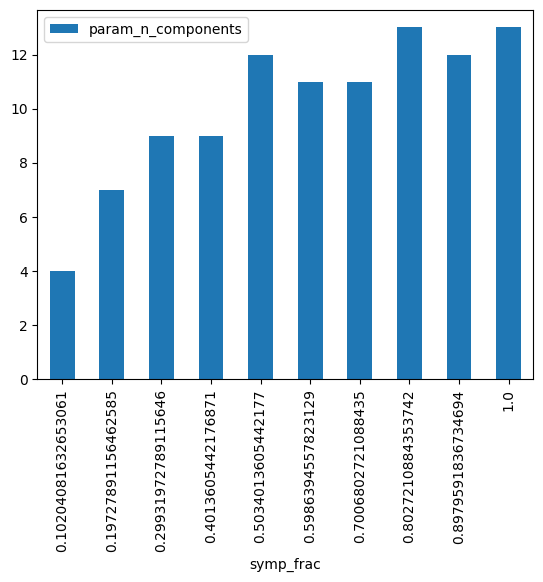

In [33]:
bestfits.plot.bar(x='symp_frac', y='param_n_components')